In [1]:
import numpy as np, librosa.display
from librosa import load
import matplotlib.pyplot as plt
seed = np.random.RandomState(0)

## Load the stereo audio file

In [2]:
X, sr = load('assets/audio.wav', mono=False)

## Create and apply augmentation pipeline

In [3]:
from sigment import *

# Create a complex augmentation pipeline 
transform = Pipeline([
    GaussianWhiteNoise(scale=(0.001, 0.0075), p=0.65),
    ExtractLoudestSection(duration=(0.85, 0.95)),
    OneOf([
        RandomCrop(crop_size=(0.01, 0.04), n_crops=(2, 5)),
        SomeOf([
            EdgeCrop('start', crop_size=(0.05, 0.1)),
            EdgeCrop('end', crop_size=(0.05, 0.1))
        ], n=(1, 2))
    ]),
    Sometimes([
        SomeOf([
            LinearFade('in', fade_size=(0.1, 0.2)),
            LinearFade('out', fade_size=(0.1, 0.2))
        ], n=(1, 2))
    ], p=0.5),
    TimeStretch(rate=(0.8, 1.2)),
    PitchShift(n_steps=(-0.25, 0.25)),
    MedianFilter(window_size=(5, 10), p=0.5)
], random_state=seed)

# Generate 25 augmentations of the signal X
Xs = transform.generate(X, n=25, sr=sr)

## Plot the original signal

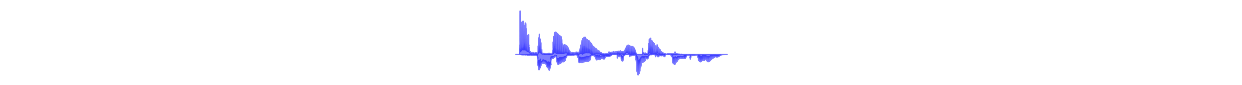

In [4]:
n = 5 # Must be odd!

fig, axs = plt.subplots(1, n, figsize=(22, 1.3), sharey=True)

for i in range(n):
    ax = axs[i]
    if i == n // 2:
        librosa.display.waveplot(np.asfortranarray(X), sr=sr, ax=ax, color='b', alpha=0.5)
    else:
        ax.plot([])
    ax.axis('off')
    
plt.savefig('original', transparent=True, bbox_inches='tight')
plt.show()

## Plot the augmentations

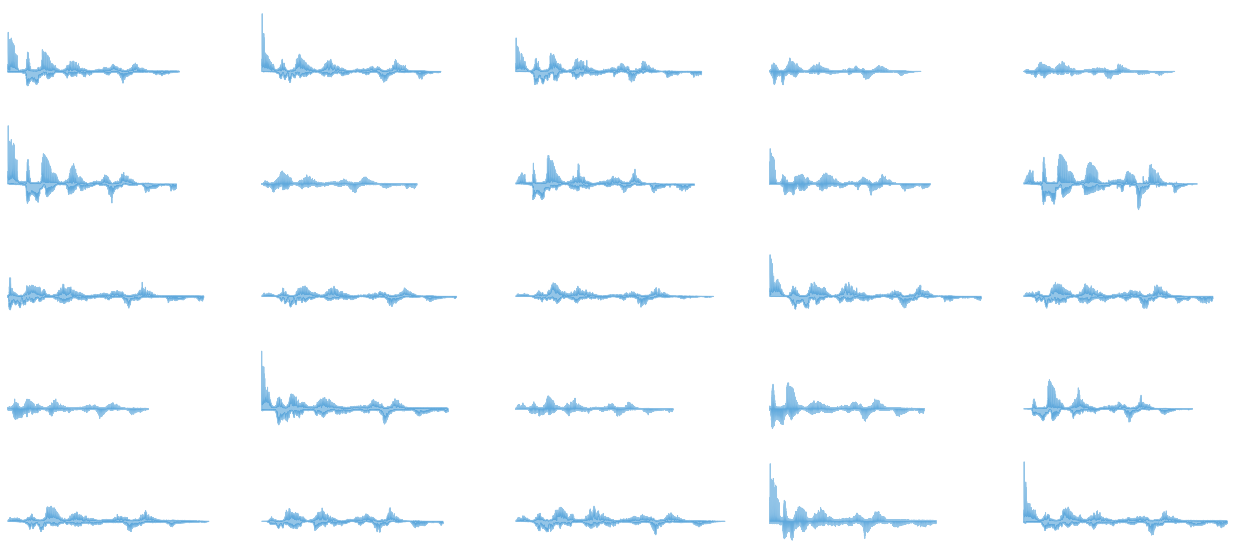

In [5]:
fig, axs = plt.subplots(n, n, figsize=(22, 10), sharey=True)
axs = axs.flat
    
for i, aug in enumerate(Xs):
    ax = axs[i]
    p = librosa.display.waveplot(np.asfortranarray(aug), sr=sr, ax=ax, color='#2a8cd1', alpha=0.5)
    ax.axis('off')
    
plt.setp(axs, xlim=(0, max(len(x.T) for x in Xs) / sr))
plt.savefig('augmented', transparent=True, bbox_inches='tight')
plt.show()